## 사이킷런으로 분류하기

In [2]:
import warnings

# 불필요한 경고 출력을 방지한다.
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd 

In [4]:
# iris 데이터셋
from sklearn.datasets import load_iris

In [5]:
# 데이터셋을 로드한다. 
iris = load_iris()

In [6]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
data = iris['data']

In [9]:
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [12]:
# 지도학습 :  분류
target = iris['target']
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [13]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [16]:
# 데이터 프레임에 데이터셋 넣기 
df_iris = pd.DataFrame(data, columns=iris.feature_names)

In [17]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
df_iris['target']=target

In [19]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
import matplotlib.pyplot as plt

In [22]:
!pip install seaborn

In [23]:
import seaborn as sns

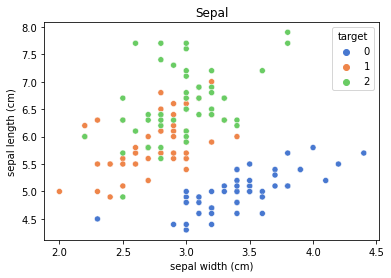

In [26]:
# scatterplot : 산점도
sns.scatterplot('sepal width (cm)', 'sepal length (cm)', hue = 'target', palette='muted', data=df_iris )
plt.title('Sepal')
plt.show()

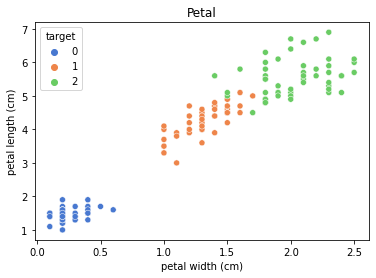

In [27]:
# scatterplot : 산점도
sns.scatterplot('petal width (cm)', 'petal length (cm)', hue = 'target', palette='muted', data=df_iris )
plt.title('Petal')
plt.show()

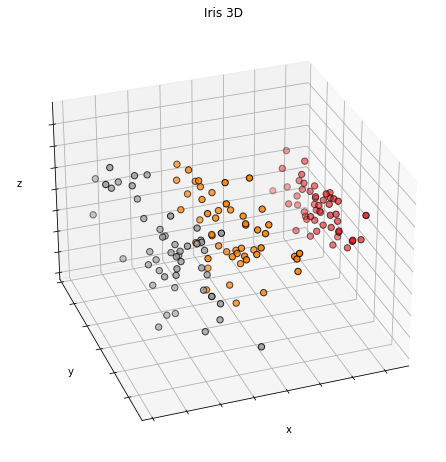

In [28]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(df_iris.drop('target', 1))
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=df_iris['target'],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Iris 3D")
ax.set_xlabel("x")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("y")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("z")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [29]:
# 학습할 데이터와 테스트 데이터를 나눈다.
from sklearn.model_selection import train_test_split

In [30]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
df_iris.drop('target',1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [32]:
# 안합쳐도 돼잖아? 별도의 프레임을 만들어도 상관 없음.. 너맘..
# x_train, x_valid --> df_iris.drop('target',1)
# y_train, y_valid --> df_iris['target']
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target',1),df_iris['target'])

In [33]:
x_train.shape, x_valid.shape

((112, 4), (38, 4))

In [34]:
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target',1),df_iris['target'], test_size=0.2)

In [35]:
x_train.shape, x_valid.shape

((120, 4), (30, 4))

In [36]:
y_train.shape, y_valid.shape

((120,), (30,))

<AxesSubplot:xlabel='target', ylabel='count'>

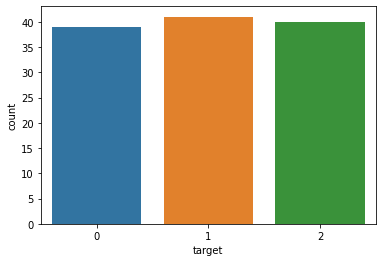

In [37]:
# train 데이터 비율 (0,1,2번의 비율. 균등하게 나오는게 가장 좋음) 0번 클래스가 10개밖에 안된다면 제대로 학습 안됨. 
# 특정 클래스 갯수가 적지 않은지 확인 필요
# 0,1,2 class 데이터 불균형이 있는지 확인할 필요가 있다. 
sns.countplot(y_train)

In [ ]:
# 여기서 특정 seed 값을 random_state 해서 지정해버려도 됨. 너무 균등하지 않으면.. 이건 실행 
# x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target',1),df_iris['target'], test_size=0.2)

In [38]:
#클래스별 데이터의 분포를 균등하게 배분 stratify 옵션
# stratify=df_iris['target']
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target',1),df_iris['target'], test_size=0.2, stratify=df_iris['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

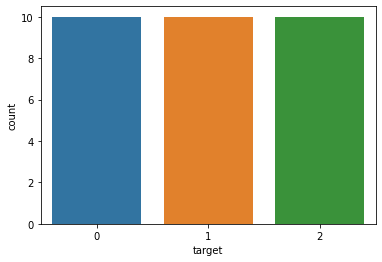

In [40]:
# 균등하게 배분됐는지 확인할 필요가 있다.
sns.countplot(y_valid)

In [41]:
y_train.shape, y_valid.shape

((120,), (30,))

## Logistic Regression

In [42]:
# 독립변수의 선형 결합을 사용하여 사건의 발생 가능성 예측 
from sklearn.linear_model import LogisticRegression

In [43]:
# 1. 모델 선언
model = LogisticRegression()

In [44]:
# 2. 모델 학습
model.fit(x_train, y_train) # 학습할 때는 문제와 정답을 알려주지만 

LogisticRegression()

In [45]:
# 3. 학습 결과 확인 = Predict 예측
prediction = model.predict(x_valid) # 예측하는데 정답을 알려줄 필요가 없음

In [46]:
prediction

array([1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 2,
       2, 2, 1, 1, 2, 2, 0, 2])

In [47]:
(prediction == y_valid) 

81      True
51      True
19      True
31      True
33      True
65      True
119    False
77     False
69      True
75      True
50      True
44      True
80      True
100     True
125     True
13      True
27      True
46      True
12      True
128     True
1       True
134     True
120     True
130     True
67      True
86      True
124     True
142     True
0       True
126     True
Name: target, dtype: bool

In [49]:
# 단위는 % 
# Logistic Regression Model 은 93% 정확도를 갖는다. 
(prediction == y_valid).mean()

0.9333333333333333

## SGD Classifier - random state 값에 따라 결과가 계속 달라짐. 이것이 약점
## but, hyper parameter 튜닝함..

Deterministic(결정론적 - 확률이 끼어들 여지가 없음. 숫자가 안바뀜) vs Stochastic(확률론적 - 확률이 끼어들 여지가 있음.)

강화학습 Frozen lake 예제
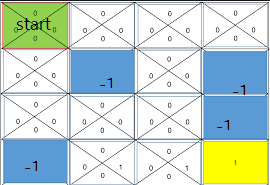

Deterministic 은 가는길이 정해져 있지만
Stochasitc 은 가다가 미끄러 질 가능성이 있음 갑자기 뒤로 갈 수도 앞으로 갈 수도 있어서 몇번 만에 정답으로 가는지 확률론적인 결과를 냄

50-100번이 아니고 최소 10000번 정도는..돌려야

In [50]:
from sklearn.linear_model import SGDClassifier

In [54]:
# 1. 모델선언
# random_state = > random seed 값. 이 값이 들어가서 랜덤한 숫자가 뽑힘. 이 숫자가 달라지면 결과가 달라짐. 
sgd = SGDClassifier(random_state=123)

In [55]:
# 2. 모델 학습
sgd.fit(x_train, y_train)

SGDClassifier(random_state=123)

In [56]:
# 3. 학습 결과 테스트
prediction = sgd.predict(x_valid)

In [58]:
prediction

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, 2, 0, 1,
       2, 1, 1, 1, 2, 2, 0, 1])

In [59]:
(prediction == y_valid).mean()

0.8

In [ ]:
# Hyper parameter Tuning - alpha 값 
# randosm_state: 하이퍼파라미터 튜닝시 고정됨. 
# n_jobs = -1 : CPU core 를 모두 사용 (학습속도가 빨라진다)
# GPU 가 아닌 CPU 로 처리 
# 머신러닝은 보통 CPU 연산임. 

In [61]:
# 과적합(overfitting)을 방지하기 위해 L1(Lasso Regulizstion)을 해준다. 
sgd = SGDClassifier(penalty='l1', random_state=123, n_jobs = -1)

In [62]:
sgd.fit(x_train, y_train)

SGDClassifier(n_jobs=-1, penalty='l1', random_state=123)

In [63]:
prediction = sgd.predict(x_valid)

In [64]:
prediction

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, 2, 0, 1,
       2, 1, 1, 1, 2, 2, 0, 1])

In [65]:
(prediction == y_valid).mean()

0.8333333333333334

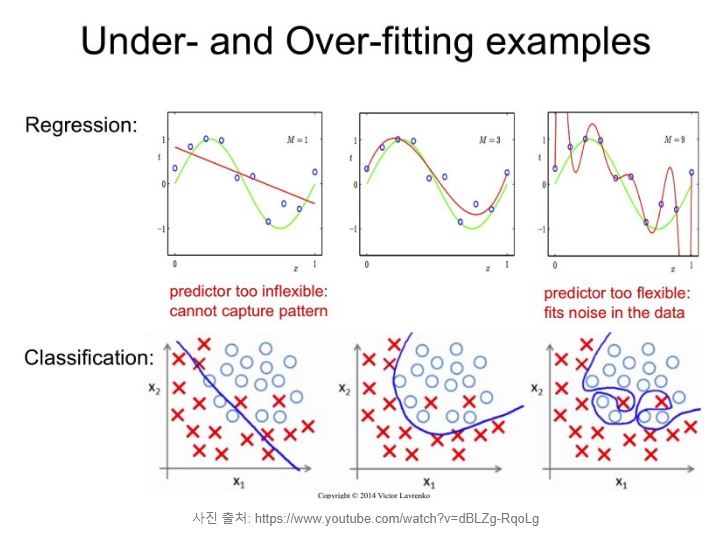

penalty 를 주면 overfitting 방지
학습데이터는 적고 학습을 하면 overfitting 일어남.
너무 잘 맞추려고 하다보니까 오버함. 

L1 규제 = 

L2 규제 = 

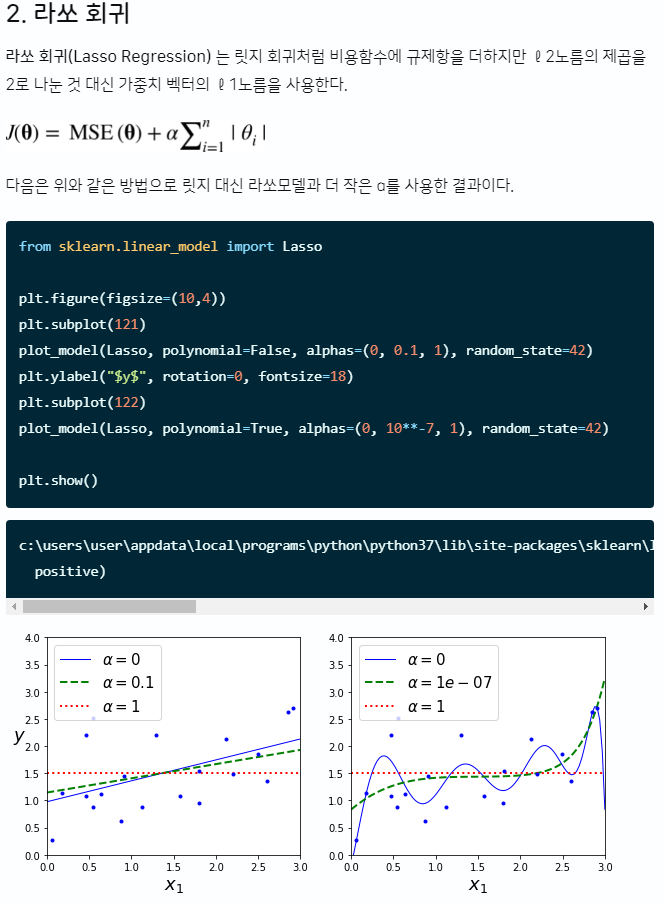

## KNN (K-Neighbors Classifier)

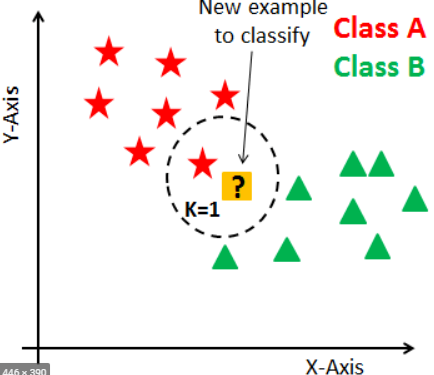

? 를 기준으로 어느정도 바운더리를 주고 그 안에 값을 뽑아 옴. 이 상황에서는 별 1개임.
거리 계산은 scikit learn 이 알아서 해주고.

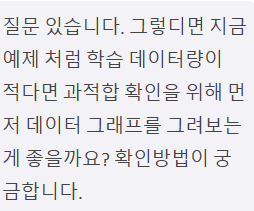

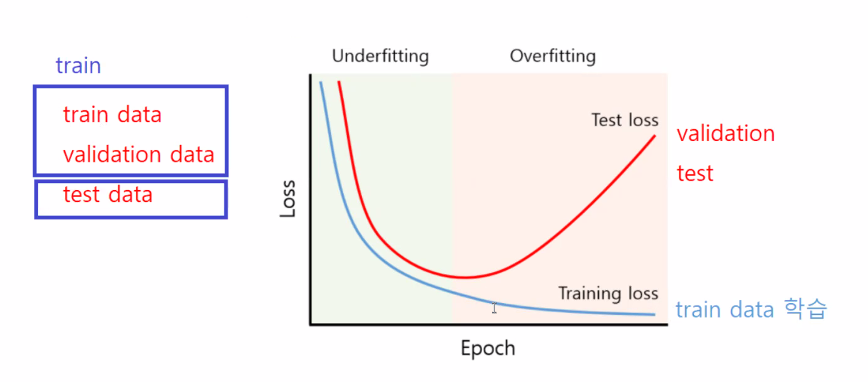

빨간 그래프의 최저가 되는 시점을 잡아서 train stop.

더이상 오버피팅이 실행되지 않도록.

데이터가 많으면 오버피팅의 시점이 늦어진다. 

knn 쓸 때 가장 먼저 모델을 선언해야디

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
# 1. Define Model
# default k = 5 (5개 가지고 평균을 냄)
model = KNeighborsClassifier()

In [68]:
# 2. Train Model
model.fit(x_train, y_train)

KNeighborsClassifier()

In [69]:
# 3. Predict Model
prediction = model.predict(x_valid)

In [70]:
prediction

array([1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 2,
       2, 2, 1, 1, 2, 2, 0, 2])

In [71]:
# 4. Accuracy check
(prediction == y_valid).mean()

0.9333333333333333

class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)[source]

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

K=7 이면

In [72]:
# iris 데이터셋의 경우 n_neighbors 값이 높을 수록 정확한 편이다........? 내껀 왜 ? 
model = KNeighborsClassifier(n_neighbors=7)
model.fit(x_train, y_train)
prediction = model.predict(x_valid)
(prediction == y_valid).mean()

0.9666666666666667

K=100 이면

In [79]:
model = KNeighborsClassifier(n_neighbors=11)
model.fit(x_train, y_train)
prediction = model.predict(x_valid)
(prediction == y_valid).mean()

0.9333333333333333

## SVC (서포트 벡터 머신)

Image(https://csstudy.files.wordpress.com/2011/03/screen-shot-2011-02-28-at-5-53-26-pm.png)
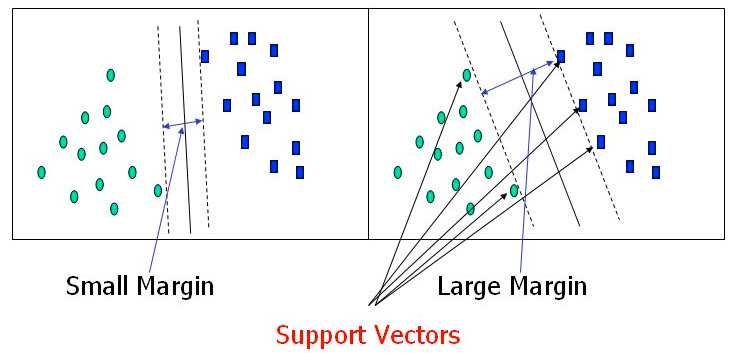

어떻게 하면 두개의 데이터로 부터 가장 멀리 떨어진 직선을 그릴 수 있을까 가 관건임.

> 새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만듦.  
> 경계로 표현되는 데이터들 중 가장 큰 폭을 가진 경계를 찾는 알고리즘.

In [80]:
from sklearn.svm import SVC

In [82]:
model = SVC(random_state=123)

In [83]:
model.fit(x_train, y_train)

SVC(random_state=123)

In [84]:
prediction = model.predict(x_valid)

In [85]:
(prediction==y_valid).mean() # 선생은 1.0 이 나옴..

0.9333333333333333

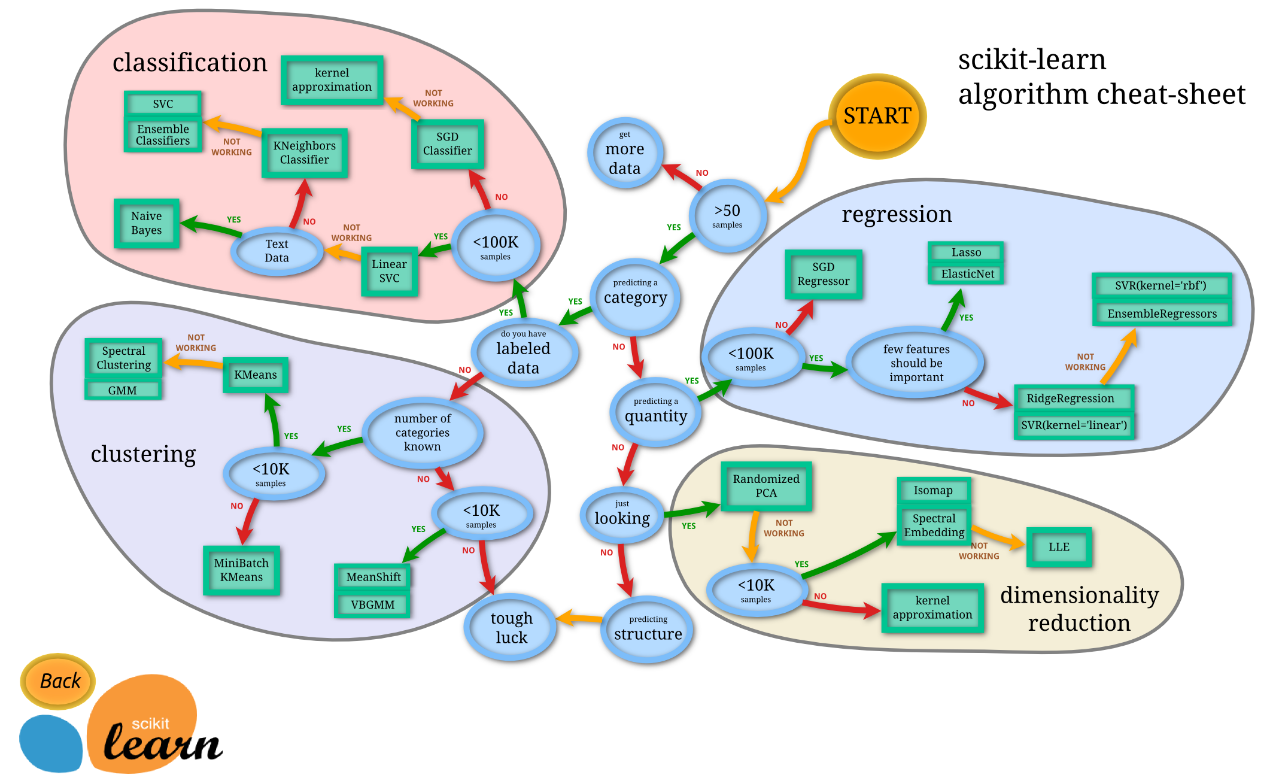

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

https://everyday-deeplearning.tistory.com/entry/%ED%98%84%EC%97%85%EC%97%90%EC%84%9C-%EB%A7%8E%EC%9D%B4-%EC%82%AC%EC%9A%A9%ED%95%98%EB%8A%94-Python-%EB%AA%A8%EB%93%88-ScikitLearn

## 의사 결정 트리 (Decision Tree)

스무고개처럼, 나무 가지치기를 통해 소그룹으로 나누어 판별하는 것

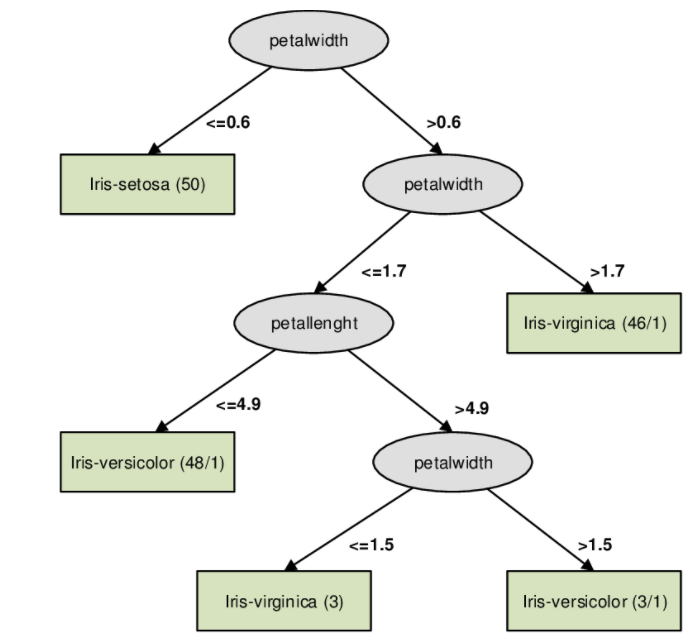

Image('https://www.researchgate.net/profile/Ludmila_Aleksejeva/publication/293194222/figure/fig1/AS:669028842487827@1536520314657/Decision-tree-for-Iris-dataset.png', width=500)

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [88]:
model = DecisionTreeClassifier(random_state = 123)

In [89]:
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=123)

In [90]:
prediction = model.predict(x_valid)

In [91]:
(prediction==y_valid).mean()

0.9

In [92]:
# !pip install graphviz

In [93]:
# 보기만 하셈..
from sklearn.tree import export_graphviz
from subprocess import call

def graph_tree(model):
    # .dot 파일로 export 해줍니다
    export_graphviz(model, out_file='tree.dot')

    # 생성된 .dot 파일을 .png로 변환
    
    call(['dot', '-Tpng', 'tree.dot', '-o', 'decistion-tree.png', '-Gdpi=600'])

    # .png 출력
    return Image(filename = 'decistion-tree.jpg', width=500)

In [ ]:
# graph_tree(model)

[Text(267.84000000000003, 587.0880000000001, 'X[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(200.88000000000002, 456.624, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(334.80000000000007, 456.624, 'X[3] <= 1.65\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(133.92000000000002, 326.1600000000001, 'X[2] <= 5.0\ngini = 0.093\nsamples = 41\nvalue = [0, 39, 2]'),
 Text(66.96000000000001, 195.69600000000003, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(200.88000000000002, 195.69600000000003, 'X[1] <= 2.75\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(133.92000000000002, 65.23200000000008, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 65.23200000000008, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(535.6800000000001, 326.1600000000001, 'X[2] <= 4.85\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(468.72, 195.69600000000003, 'X[1] <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Tex

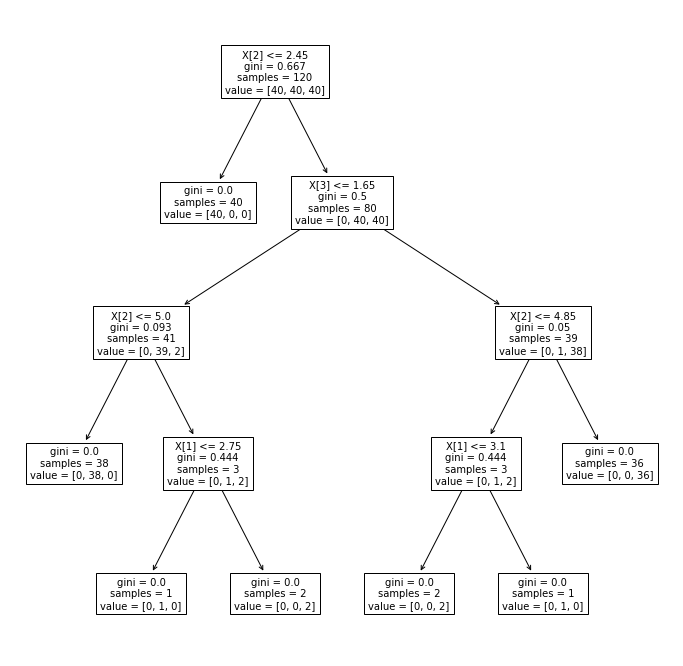

In [97]:
plt.figure(figsize=(12,12))
tree.plot_tree(model, fontsize=10)